<a href="https://colab.research.google.com/github/Osstrinha/Fisica-Computacional-2/blob/main/P_1_Augusto_Paulo_Schmidt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
print(sys.version)

print("link para arquivo: https://colab.research.google.com/drive/1v_QyxRhPIt34w5rDlKrXAnE50Bpb3IUL?usp=sharing")

3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
link para arquivo: https://colab.research.google.com/drive/1v_QyxRhPIt34w5rDlKrXAnE50Bpb3IUL?usp=sharing


Questão 1

a)


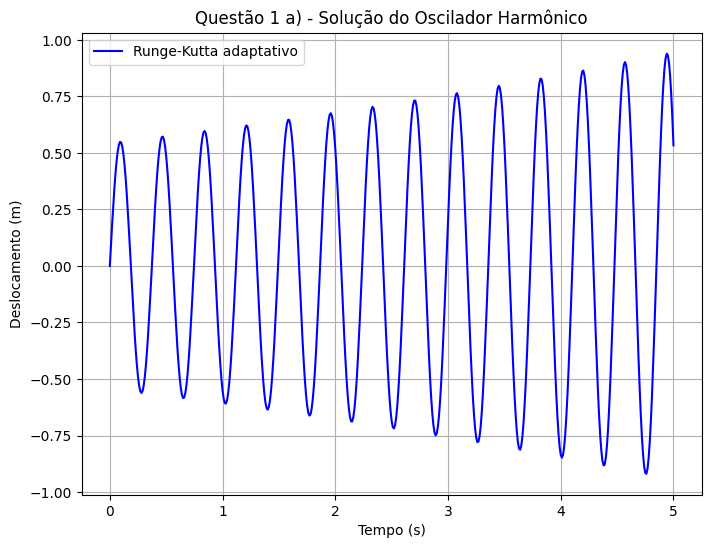


b)


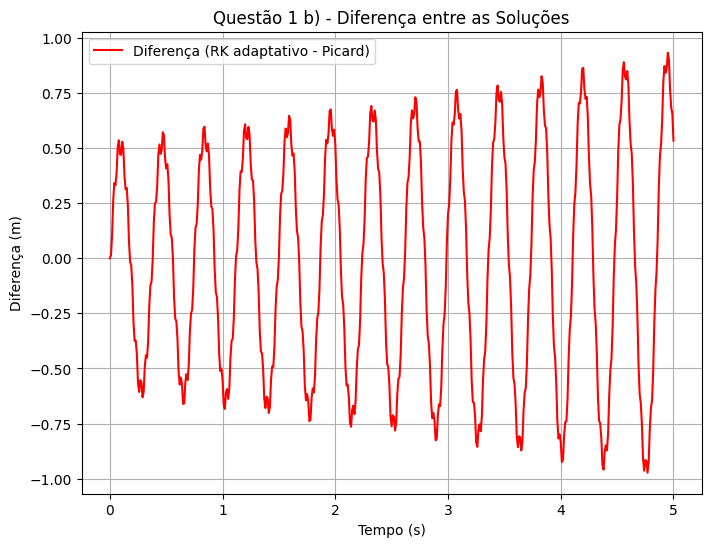

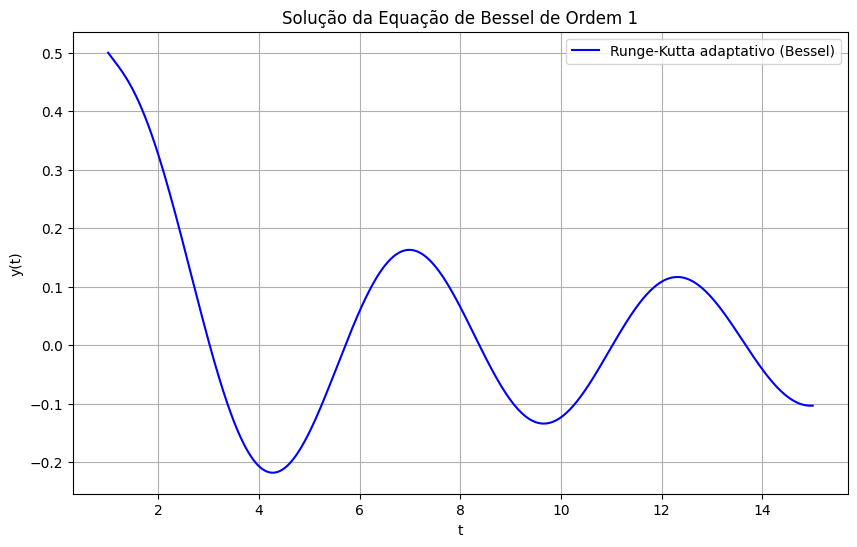

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função de oscilador harmônico
def oscilador_harmonico(t, y, v, k=20, m=0.1):
    return -k / m * y

# Função Runge-Kutta adaptativo de 4ª ordem
def runge_kutta_adaptativo(f, t0, y0, v0, dt, tmax):
    t = np.arange(t0, tmax + dt, dt)
    y = np.zeros(len(t))
    v = np.zeros(len(t))
    y[0] = y0
    v[0] = v0

    # Coeficientes do método de Runge-Kutta adaptativo
    b1 = 35/384
    b2 = 0
    b3 = 500/1113
    b4 = 125/192

    # Loop para calcular a solução
    for i in range(1, len(t)):
        # Estimativas de c1, c2, c3, c4
        c1y = dt * v[i - 1]
        c1v = dt * f(t[i - 1], y[i - 1], v[i - 1])

        c2y = dt * (v[i - 1] + 1/5 * c1v)
        c2v = dt * f(t[i - 1] + 1/5 * dt, y[i - 1] + 1/5 * c1y, v[i - 1] + 1/5 * c1v)

        c3y = dt * (v[i - 1] + 3/10 * c2v)
        c3v = dt * f(t[i - 1] + 3/10 * dt, y[i - 1] + 3/40 * c1y + 9/40 * c2y, v[i - 1] + 3/40 * c1v + 9/40 * c2v)

        c4y = dt * (v[i - 1] + 44/45 * c1v - 56/15 * c2v + 32/9 * c3v)
        c4v = dt * f(t[i - 1] + 4/5 * dt, y[i - 1] + 44/45 * c1y - 56/15 * c2y + 32/9 * c3y,
                      v[i - 1] + 44/45 * c1v - 56/15 * c2v + 32/9 * c3v)

        # Atualizando a solução com os coeficientes b1, b2, b3 e b4
        y[i] = y[i - 1] + b1 * c1y + b2 * c2y + b3 * c3y + b4 * c4y
        v[i] = v[i - 1] + b1 * c1v + b2 * c2v + b3 * c3v + b4 * c4v

    return t, y

# Definindo condições iniciais e parâmetros
t0, y0, v0 = 0, 0, 7.7  # Tempo inicial, posição e velocidade
dt, tmax = 0.01, 5       # Passo de tempo e tempo final

# Solução pelo método de Runge-Kutta adaptativo
t_rk, y_rk = runge_kutta_adaptativo(oscilador_harmonico, t0, y0, v0, dt, tmax)

# Método de Picard (Iterativo para solução aproximada)
def picard_iteration(t, y0, v0, dt, k=20, m=0.1, max_iter=10):
    y = np.zeros(len(t))
    y[0] = y0
    v = v0

    for i in range(1, len(t)):
        integral = 0
        for _ in range(max_iter):
            integral = v0 * (t[i] - t[0]) - (k / m) * np.trapz(y[:i], t[:i])
        y[i] = y0 + integral
    return y

# Calculando a solução aproximada pelo método de Picard
y_picard = picard_iteration(t_rk, y0, v0, dt)

# Diferença entre as soluções
diff = y_rk - y_picard

# Gráficos
print("Questão 1")
print()
print("a)")

# Gráfico da solução do oscilador harmônico com Runge-Kutta adaptativo
plt.figure(figsize=(8, 6))
plt.plot(t_rk, y_rk, label='Runge-Kutta adaptativo', color='blue')
plt.title('Questão 1 a) - Solução do Oscilador Harmônico')
plt.xlabel('Tempo (s)')
plt.ylabel('Deslocamento (m)')
plt.legend()
plt.grid()
plt.show()

print()
print("b)")

# Gráfico da diferença entre as soluções
plt.figure(figsize=(8, 6))
plt.plot(t_rk, diff, label='Diferença (RK adaptativo - Picard)', color='red')
plt.title('Questão 1 b) - Diferença entre as Soluções')
plt.xlabel('Tempo (s)')
plt.ylabel('Diferença (m)')
plt.legend()
plt.grid()
plt.show()

# Função de Bessel corrigida
def bessel_eq(t, y, dy):
    d2y = (-t * dy - (t**2 - 1) * y) / t**2  # Derivada de segunda ordem (equação de Bessel)
    return d2y

# Solução para a equação de Bessel com Runge-Kutta adaptativo
t_bessel, y_bessel = runge_kutta_adaptativo(bessel_eq, 1, 0.5, -0.1, 0.01, 15)

# Gráfico da solução da equação de Bessel
plt.figure(figsize=(10, 6))
plt.plot(t_bessel, y_bessel, label='Runge-Kutta adaptativo (Bessel)', color='blue')
plt.title('Solução da Equação de Bessel de Ordem 1')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()





Questão 2



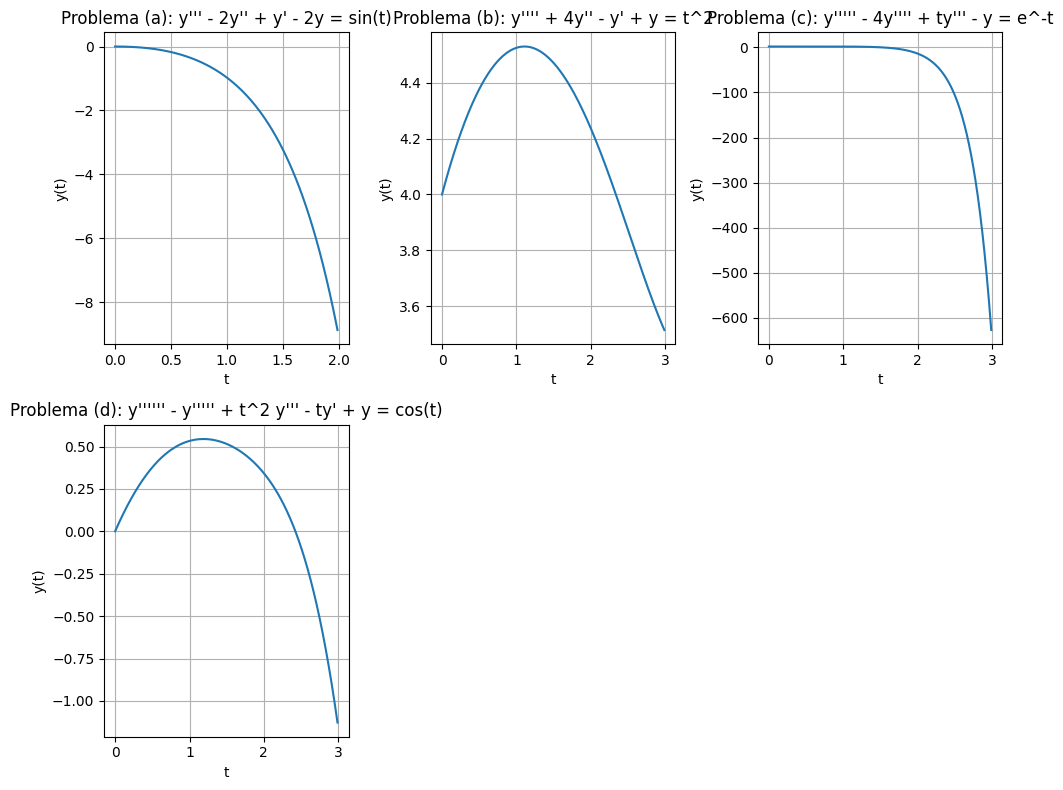

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função Runge-Kutta de 4 ordem
def rk4(y, t, dt, f, *args):
    k1 = f(y, t, *args)
    k2 = f(y + 0.5 * dt * k1, t + 0.5 * dt, *args)
    k3 = f(y + 0.5 * dt * k2, t + 0.5 * dt, *args)
    k4 = f(y + dt * k3, t + dt, *args)
    return y + dt * (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Problema (a): y''' - 2y'' + y' - 2y = sin(t)
def f_a(y, t):
    y1, y2, y3 = y
    dy1 = y2
    dy2 = y3
    dy3 = 2 * y1 + np.sin(t) - y2 + 2 * y3
    return np.array([dy1, dy2, dy3])

# Problema (b): y'''' + 4y'' - y' + y = t^2
def f_b(y, t):
    y1, y2, y3, y4 = y
    dy1 = y2
    dy2 = y3
    dy3 = y4
    dy4 = -4 * y3 + y2 - y1 + t**2
    return np.array([dy1, dy2, dy3, dy4])


# Problema (c): y''''' - 4y'''' + ty''' - y = e^-t
def f_c(y, t):
    y1, y2, y3, y4, y5 = y
    dy1 = y2
    dy2 = y3
    dy3 = y4
    dy4 = y5
    dy5 = 4 * y5 - t * y4 + y1 - np.exp(-t)
    return np.array([dy1, dy2, dy3, dy4, dy5])

# Problema (d): y'''''' - y''''' + t^2 y''' - ty' + y = cos(t)
def f_d(y, t):
    y1, y2, y3, y4, y5, y6 = y
    dy1 = y2
    dy2 = y3
    dy3 = y4
    dy4 = y5
    dy5 = y6
    dy6 = -t**2 * y4 + y6 - y1 - t * y2 + np.cos(t)
    return np.array([dy1, dy2, dy3, dy4, dy5, dy6])

# Parâmetros do problema
dt = 0.01  # Passo de tempo


# Condições iniciais
y0_a = np.array([0, 0, -1])
t_a = np.arange(0, 2, dt)
y_a = np.zeros((len(t_a), 3))
y_a[0] = y0_a


y0_b = np.array([4, 1, -1, 0])
t_b = np.arange(0, 3, dt)
y_b = np.zeros((len(t_b), 4))
y_b[0] = y0_b


y0_c = np.array([2, 0, 0, 1, -2])
t_c = np.arange(0, 3, dt)
y_c = np.zeros((len(t_c), 5))
y_c[0] = y0_c


y0_d = np.array([0, 1, -1, 0, 1, -1])
t_d = np.arange(0, 3, dt)
y_d = np.zeros((len(t_d), 6))
y_d[0] = y0_d

print("Questão 2")
print()

# Resolver usando Runge-Kutta para cada problema
for i in range(1, len(t_a)):
    y_a[i] = rk4(y_a[i-1], t_a[i-1], dt, f_a)

for i in range(1, len(t_b)):
    y_b[i] = rk4(y_b[i-1], t_b[i-1], dt, f_b)

for i in range(1, len(t_c)):
    y_c[i] = rk4(y_c[i-1], t_c[i-1], dt, f_c)

for i in range(1, len(t_d)):
    y_d[i] = rk4(y_d[i-1], t_d[i-1], dt, f_d)


# Plotando os resultados
plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.plot(t_a, y_a[:, 0], label="y(t) para o problema (a)")
plt.title("Problema (a): y''' - 2y'' + y' - 2y = sin(t)")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(t_b, y_b[:, 0], label="y(t) para o problema (b)")
plt.title("Problema (b): y'''' + 4y'' - y' + y = t^2")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(t_c, y_c[:, 0], label="y(t) para o problema (c)")
plt.title("Problema (c): y''''' - 4y'''' + ty''' - y = e^-t")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(t_d, y_d[:, 0], label="y(t) para o problema (d)")
plt.title("Problema (d): y'''''' - y''''' + t^2 y''' - ty' + y = cos(t)")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)


plt.tight_layout()
plt.show()

a)


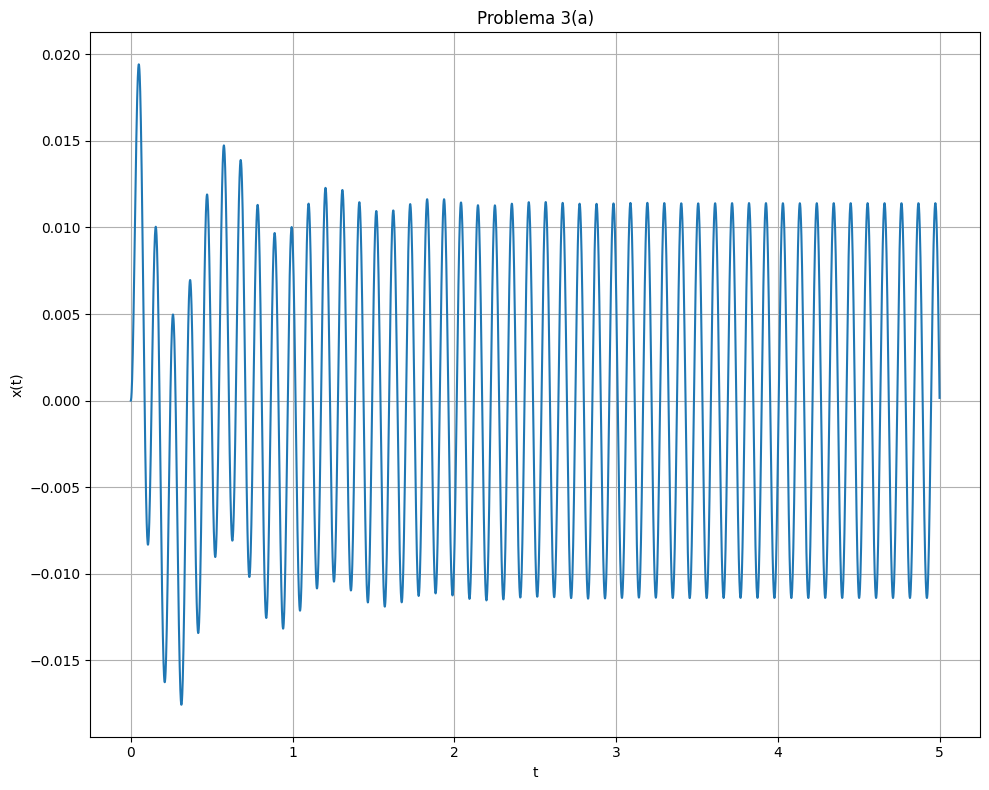

b)
O ponto de maior amplitude ocorre em t = 0.05 segundos, sendo x(0.05) = 0.02m.
c)


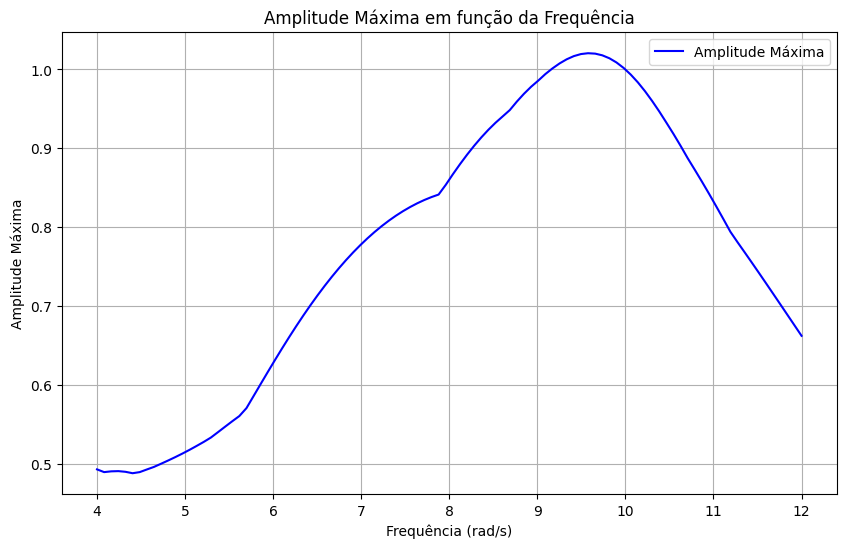

Como extra, achei que seria interessante observar em quanto tempo é atingido a amplitude máxima, para cada frequência.


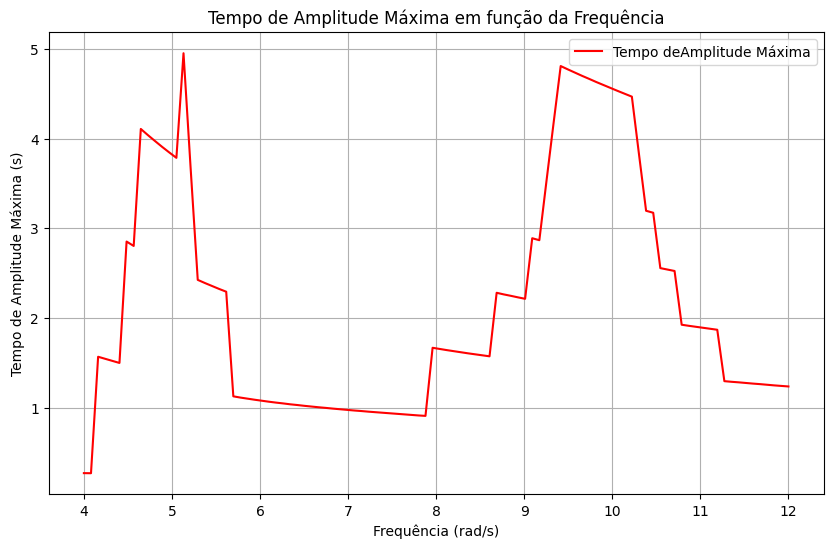

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função Runge-Kutta de 4 ordem
def rk4(y, t, dt, f, *args):
    k1 = f(y, t, *args)
    k2 = f(y + 0.5 * dt * k1, t + 0.5 * dt, *args)
    k3 = f(y + 0.5 * dt * k2, t + 0.5 * dt, *args)
    k4 = f(y + dt * k3, t + dt, *args)
    return y + dt * (k1 + 2 * k2 + 2 * k3 + k4) / 6


def forcas(y, t, gamma=4, w0=10, f0=40, w=60):
    y1, y2 = y
    dy1 = y2
    dy2 = -gamma * y2 - w0**2 * y1 + f0 * np.cos(w * t)
    return np.array([dy1, dy2])

dt = 0.001  # Passo de tempo
tmax = 5.0 # Tempo máximo

print("a)")

# Condições iniciais
y0_a = np.array([0, 0])
t_a = np.arange(0, tmax, dt)
y_a = np.zeros((len(t_a), 2))
y_a[0] = y0_a

for i in range(1, len(t_a)):
    y_a[i] = rk4(y_a[i-1], t_a[i-1], dt, forcas)

plt.figure(figsize=(10, 8))
plt.plot(t_a, y_a[:, 0], label="Solução por Runge-Kutta 4 ordem")
plt.title("Problema 3(a)")
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)
plt.tight_layout()
plt.show()


print("b)")


# Encontrar o ponto de maior amplitude
amplitude_max = np.max(y_a[:, 0])  # Valor máximo de x(t)
t_amplitude_max = t_a[np.argmax(y_a[:, 0])]  # Tempo correspondente

print(f"O ponto de maior amplitude ocorre em t = {t_amplitude_max:.2f} segundos, sendo x({t_amplitude_max:.2f}) = {amplitude_max:.2f}m.")


print("c)")


frequencias = np.linspace(4, 12, 100)  # Gera um array de frequências no intervalo desejado
amplitudes_maximas = []  # Lista para armazenar as amplitudes máximas
tempos_correspondentes = []  # Lista para armazenar os tempos correspondentes

for omega in frequencias:
    # Redefine as condições iniciais para cada frequência
    y_a[0] = y0_a

    # Resolve o sistema para a frequência atual
    for i in range(1, len(t_a)):
        y_a[i] = rk4(y_a[i-1], t_a[i-1], dt, forcas, 4, 10, 40, omega)

    # Armazena a amplitude máxima e o tempo correspondente
    amplitude_max = np.max(y_a[:, 0])
    t_amplitude_max = t_a[np.argmax(y_a[:, 0])]
    amplitudes_maximas.append(amplitude_max)
    tempos_correspondentes.append(t_amplitude_max)

# Convertendo as listas em arrays para facilitar análise e plotagem
amplitudes_maximas = np.array(amplitudes_maximas)
tempos_correspondentes = np.array(tempos_correspondentes)

# Gráfico de amplitude máxima vs frequência
plt.figure(figsize=(10, 6))
plt.plot(frequencias, amplitudes_maximas, label="Amplitude Máxima", color='blue')
plt.title("Amplitude Máxima em função da Frequência")
plt.xlabel("Frequência (rad/s)")
plt.ylabel("Amplitude Máxima")
plt.grid(True)
plt.legend()
plt.show()

print("Como extra, achei que seria interessante observar em quanto tempo é atingido a amplitude máxima, para cada frequência.")


# Gráfico de tempo de amplitude máxima vs frequência
plt.figure(figsize=(10, 6))
plt.plot(frequencias, tempos_correspondentes, label="Tempo deAmplitude Máxima", color='red')
plt.title("Tempo de Amplitude Máxima em função da Frequência")
plt.xlabel("Frequência (rad/s)")
plt.ylabel("Tempo de Amplitude Máxima (s)")
plt.grid(True)
plt.legend()
plt.show()
